# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Dell\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data
_Considering only 6000 data points to avoid memory issues_

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
#Consider only 6000 data points to avoid memory issues
project_data = project_data[0:6000]

In [4]:
print("Number of data points in project data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in project data (6000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  5102 , ( 85.03333333333333 %)
Number of projects thar are not approved for funding  898 , ( 14.966666666666667 %)


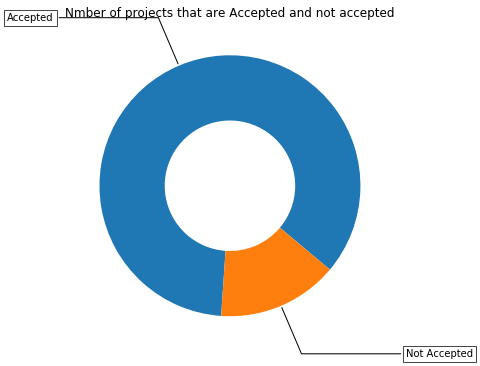

In [6]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

__Observations__
- Among the 6000 observations, around 85% of the projects are approved for funding 

### 1.2.1 Univariate Analysis: School State

In [7]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')


__Observations__
- From the heatmap, we can see the % of project approval by states: New Hampshire (NH) and North Dakota (ND) has an approval rate of 100% while Vermont (VT) and South Dakota (SD) has the least approval rates of 50% and 68% respectively

In [8]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.500000
41         SD       0.684211
50         WY       0.727273
7          DC       0.730769
0          AK       0.736842
States with highest % approvals
   state_code  num_proposals
11         HI       0.966667
16         KS       0.975000
30         NH       1.000000
28         ND       1.000000
8          DE       1.000000


In [9]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [10]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

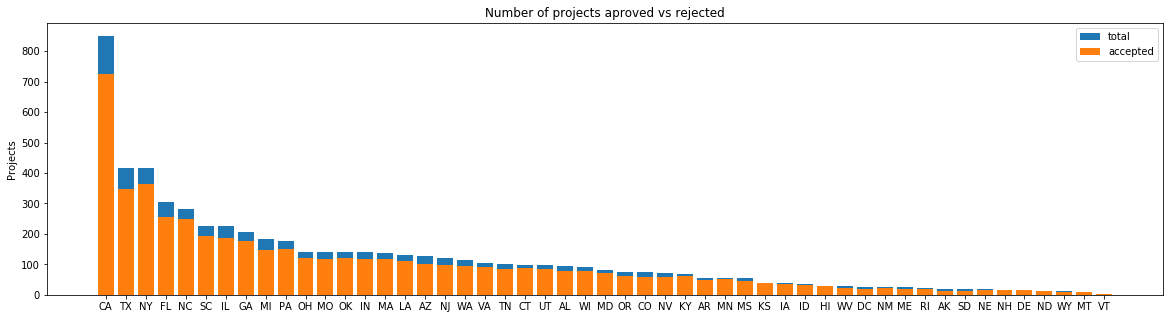

   school_state  project_is_approved  total       Avg
4            CA                  725    850  0.852941
43           TX                  346    418  0.827751
34           NY                  365    416  0.877404
9            FL                  255    305  0.836066
27           NC                  248    282  0.879433
   school_state  project_is_approved  total       Avg
8            DE                   17     17  1.000000
28           ND                   12     12  1.000000
50           WY                    8     11  0.727273
26           MT                    8     10  0.800000
46           VT                    1      2  0.500000


In [11]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__Observations__
-  Vermont,  Montana and Wyoming have the least number of project proposal submissions. Interestingly, these states have the lowest project approval rate too
- Califormia, Texas and New York have the highest number project submissions and their approval rates are centered around the mean approval rate (85%) 

### 1.2.2 Univariate Analysis: teacher_prefix

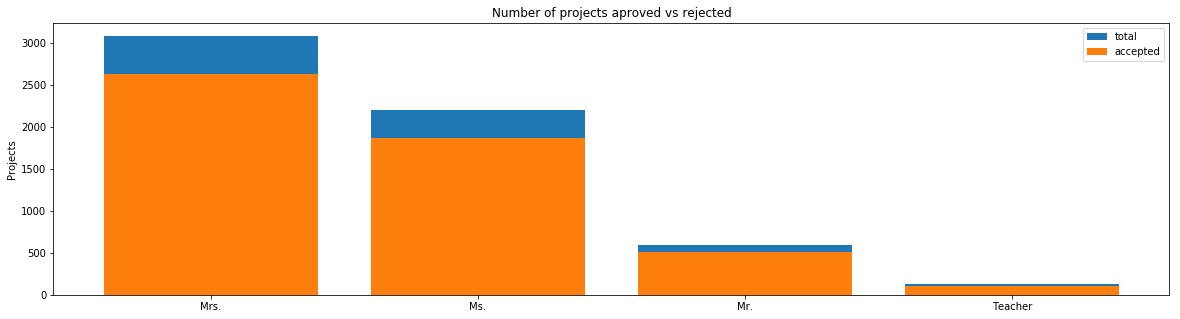

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2626   3081  0.852321
2            Ms.                 1864   2203  0.846119
0            Mr.                  513    591  0.868020
3        Teacher                   99    125  0.792000
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2626   3081  0.852321
2            Ms.                 1864   2203  0.846119
0            Mr.                  513    591  0.868020
3        Teacher                   99    125  0.792000


In [12]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

__Observations__
- Teachers with 'Mrs' and 'Ms' prefixes have submitted the highest number of projects
- The 'Teacher' prefix has the lowest approval rate of 79.2% 

### 1.2.3 Univariate Analysis: project_grade_category

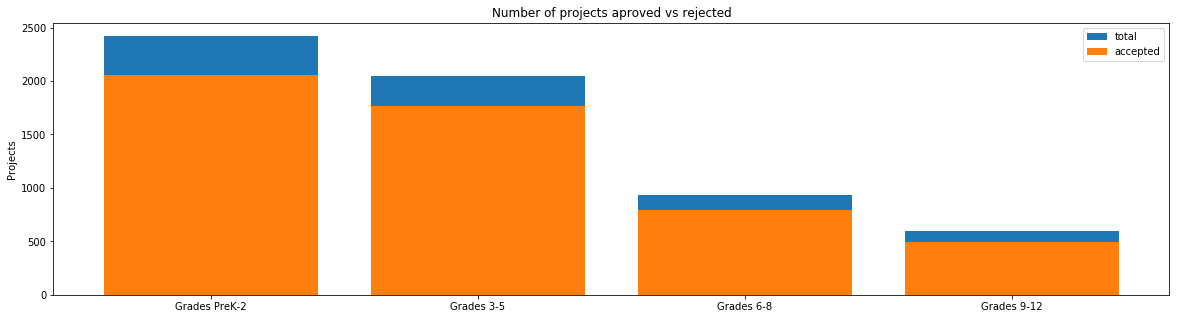

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 2052   2422  0.847234
0             Grades 3-5                 1763   2048  0.860840
1             Grades 6-8                  791    933  0.847803
2            Grades 9-12                  496    597  0.830821
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 2052   2422  0.847234
0             Grades 3-5                 1763   2048  0.860840
1             Grades 6-8                  791    933  0.847803
2            Grades 9-12                  496    597  0.830821


In [13]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

__Observations__
- Most (around 75%) of the project submissions are for grades prek to grades 5 
- Higher the grade, lower the number of project proposal submission by the teachers


### 1.2.4 Univariate Analysis: project_subject_categories

In [14]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [15]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

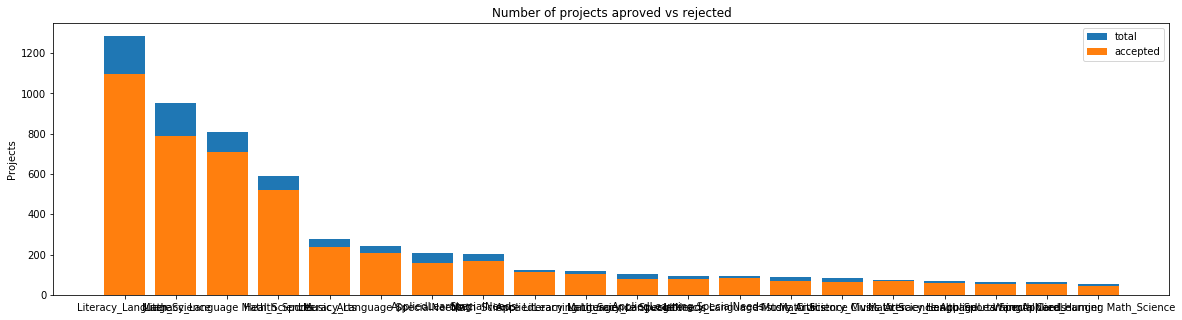

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                 1097   1285  0.853696
31                    Math_Science                  788    952  0.827731
27  Literacy_Language Math_Science                  708    810  0.874074
8                    Health_Sports                  522    592  0.881757
39                      Music_Arts                  238    277  0.859206
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                   70     75  0.933333
32      Math_Science AppliedLearning                   58     67  0.865672
14        Health_Sports SpecialNeeds                   56     65  0.861538
48                Warmth Care_Hunger                   55     63  0.873016
4       AppliedLearning Math_Science                   46     56  0.821429


In [16]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

__Observations__
- Literacy_language, Math_Science and Both together have the highest number of submissions while categories such as Applied Learning, Math Science, Warmth, Care_Hunger, Health Sports and Special Needs have the lowest project submissions 


In [17]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

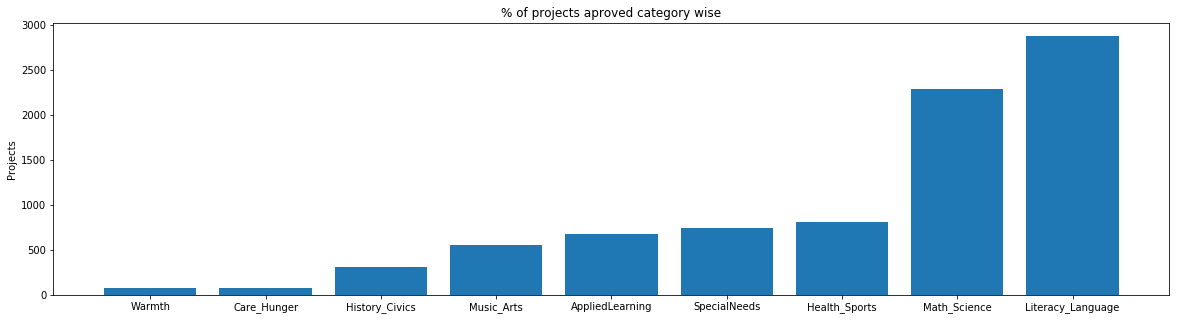

In [18]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [19]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :        71
Care_Hunger          :        71
History_Civics       :       308
Music_Arts           :       557
AppliedLearning      :       678
SpecialNeeds         :       744
Health_Sports        :       811
Math_Science         :      2291
Literacy_Language    :      2874


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [20]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [21]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

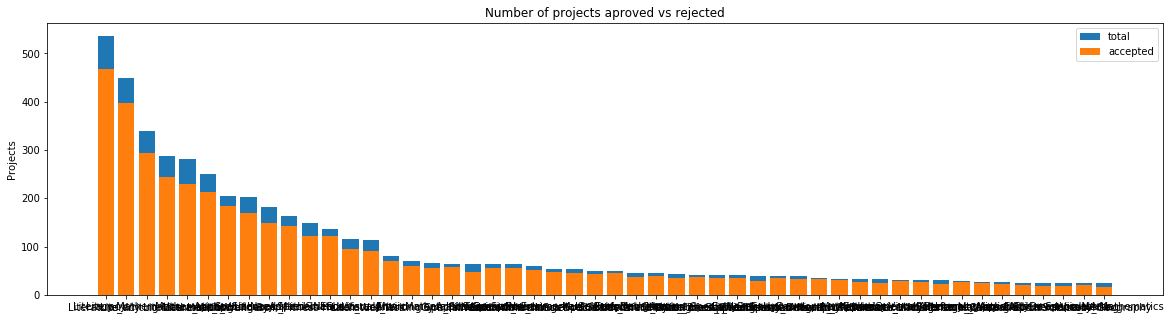

                clean_subcategories  project_is_approved  total       Avg
203                        Literacy                  468    536  0.873134
205            Literacy Mathematics                  397    450  0.882222
215  Literature_Writing Mathematics                  294    340  0.864706
204     Literacy Literature_Writing                  245    287  0.853659
223                     Mathematics                  230    282  0.815603
                       clean_subcategories  project_is_approved  total  \
63   College_CareerPrep Literature_Writing                   21     25   
23              AppliedSciences VisualArts                   18     25   
246                     Other SpecialNeeds                   18     24   
105           EarlyDevelopment Mathematics                   20     24   
194                      History_Geography                   16     24   

          Avg  
63   0.840000  
23   0.720000  
246  0.750000  
105  0.833333  
194  0.666667  


In [22]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

__Observations__
- Subcategories such as Literacy, Literature_Writing and Mathematics, and Literacy and Mathematics have the highest number of project submissions while the ones such as History and Geography, Early Development and Mathematics and Special Needs have the lowest project submissions. The sub categories with the lowest project submissions tend to have below average approval rates


In [23]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

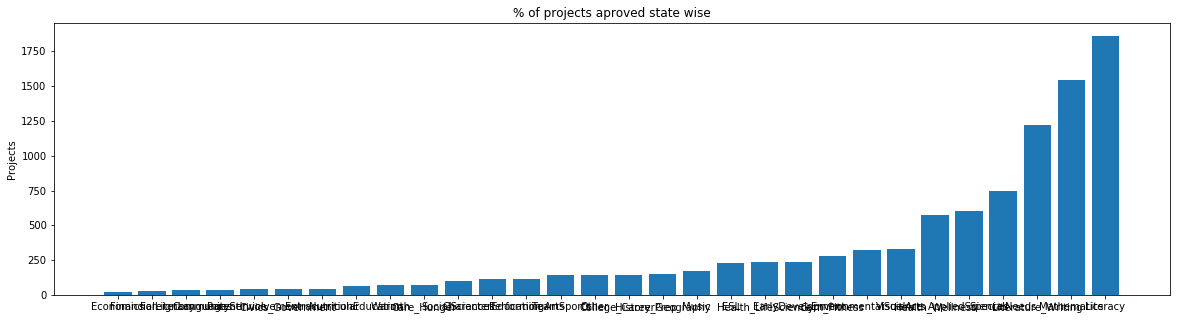

In [24]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [25]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :        18
FinancialLiteracy    :        29
ForeignLanguages     :        35
CommunityService     :        36
ParentInvolvement    :        39
Civics_Government    :        41
Extracurricular      :        41
NutritionEducation   :        67
Warmth               :        71
Care_Hunger          :        71
SocialSciences       :       103
CharacterEducation   :       112
PerformingArts       :       112
TeamSports           :       140
Other                :       143
College_CareerPrep   :       144
History_Geography    :       153
Music                :       170
ESL                  :       226
Health_LifeScience   :       235
EarlyDevelopment     :       235
Gym_Fitness          :       276
EnvironmentalScience :       320
VisualArts           :       330
Health_Wellness      :       573
AppliedSciences      :       604
SpecialNeeds         :       744
Literature_Writing   :      1218
Mathematics          :      1546
Literacy             :      1860


### 1.2.6 Univariate Analysis: Text features (Title)

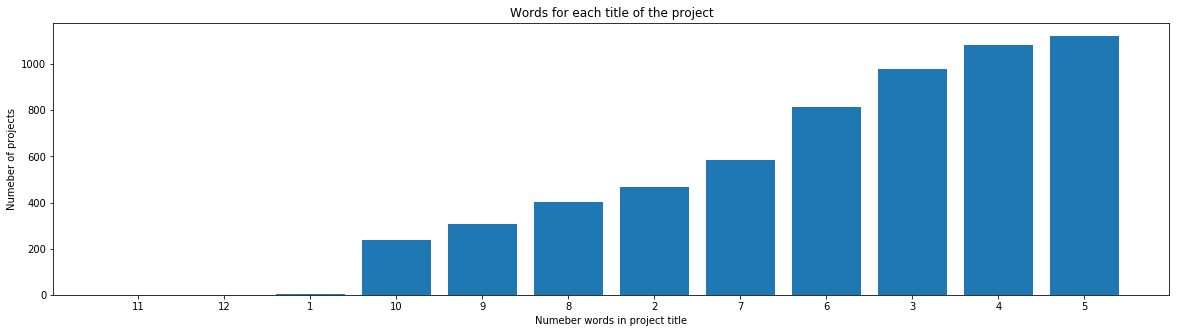

In [26]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

__Observations__
- Most project titles have 3 to 7 words
- There are very few projects with more than 10 words or less than 2 words in the title

In [27]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

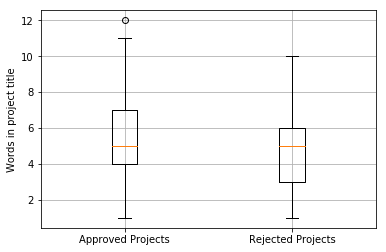

In [28]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

__Observations__
- Even though the mean words in approved and rejected projects are similar, most of the approved projects have a higher word count in their title than the word count in rejected projects


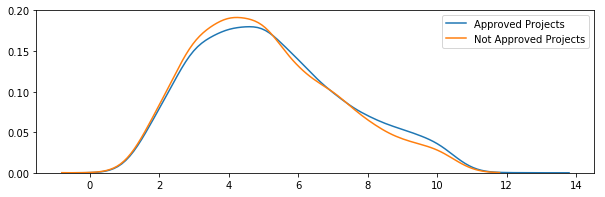

In [29]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

__Observations__
- As seen before, approved projects tend to have more words in their project title than rejected projects

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [30]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [31]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

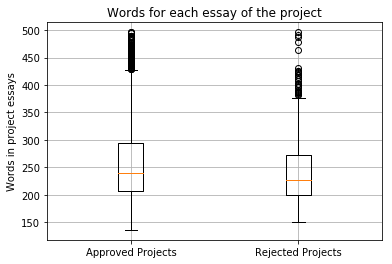

In [32]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

__Observations__
- Approved projects have slightly higher word count than rejected projects

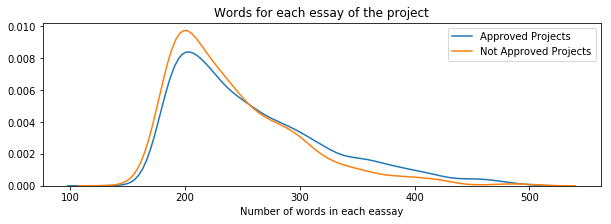

In [33]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

__Observations__
- As seen before, approved projects typically have a higher word count in their essays than rejected projects

### 1.2.8 Univariate Analysis: Cost per project

In [34]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [35]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [36]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

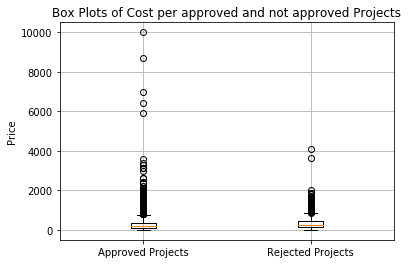

In [38]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

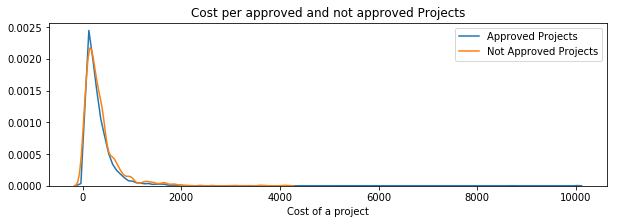

In [39]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [40]:
print ("Median approved price: {}".format(np.median(approved_price)))
print ("Median rejected price: {}".format(np.median(rejected_price)))
print ("Mean approved price: {}".format(np.mean(approved_price)))
print ("Mean rejected price: {}".format(np.mean(rejected_price)))


Median approved price: 199.98000000000002
Median rejected price: 256.145
Mean approved price: 291.6376323010584
Mean rejected price: 350.7359799554566


__Observations__
- The boxplot does not provide much useful information due to the presence of high number of values outside the IQR 
- The rejected projects tend to higher price than the approved ones 
- Both mean and median prices are higher for the rejected projects 

In [41]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        1.44       |          5.19         |
|     5      |       14.952      |         37.626        |
|     10     |       35.778      |         72.277        |
|     15     |       57.242      |         99.703        |
|     20     |       76.518      |        124.242        |
|     25     |       101.36      |        141.005        |
|     30     |      119.943      |        156.685        |
|     35     |       139.97      |         179.0         |
|     40     |       159.0       |        201.696        |
|     45     |      178.946      |        229.302        |
|     50     |       199.98      |        256.145        |
|     55     |       229.0       |        287.028        |
|     60     |       258.52      |        314.274        |
|     65     |      287.357      |        353.691       

<h3><font color='black'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>


In [42]:
approved_teacher_previous_project_number = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
rejected_teacher_previous_project_number = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

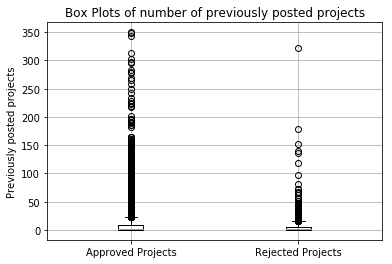

In [43]:
plt.boxplot([approved_teacher_previous_project_number, rejected_teacher_previous_project_number])
plt.title('Box Plots of number of previously posted projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Previously posted projects')
plt.grid()
plt.show()

__Observations__
- There are a lot of teachers who have previously submitted more than 200 proposals and those teachers comes in the approved projects category 



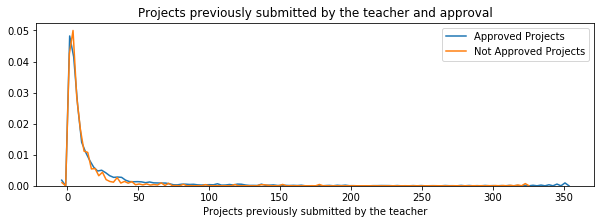

In [44]:
plt.figure(figsize=(10,3))
sns.distplot(approved_teacher_previous_project_number, hist=False, label="Approved Projects")
sns.distplot(rejected_teacher_previous_project_number, hist=False, label="Not Approved Projects")
plt.title('Projects previously submitted by the teacher and approval')
plt.xlabel('Projects previously submitted by the teacher')
plt.legend()
plt.show()

__Observations__
- The number of projects previously submitted by the teacher is mostly less than 25 


In [45]:
y = PrettyTable()
y.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    y.add_row([i,np.round(np.percentile(approved_teacher_previous_project_number,i), 3), np.round(np.percentile(rejected_teacher_previous_project_number,i), 3)])
print(y)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          4.0         

__Observations__ 
- As seen before, 95% of the project submissions are done by teachers who have previosly submitted 55 projects or fewer in case of approved projects and 26 projects or fewer in case of rejected projects

<h3><font color='black'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` affects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [46]:
#Total number of digits in the project resource summary 
project_data['num_digits_in_proj_resou_summary'] = project_data['project_resource_summary'].apply(lambda x: sum([char.isdigit() for char in x]))

In [47]:
approved_num_digits = project_data[project_data['project_is_approved']==1]['num_digits_in_proj_resou_summary'].values
rejected_num_digits = project_data[project_data['project_is_approved']==0]['num_digits_in_proj_resou_summary'].values

In [48]:
print ('Mean number of digits in the approved projects: {}'.format(np.mean(approved_num_digits)))
print ('Mean number of digits in the rejected projects: {}'.format(np.mean(rejected_num_digits)))
print ('Median number of digits in the approved projects: {}'.format(np.median(approved_num_digits)))
print ('Median number of digits in the approved projects: {}'.format(np.median(rejected_num_digits)))


Mean number of digits in the approved projects: 0.2808702469619757
Mean number of digits in the rejected projects: 0.19487750556792874
Median number of digits in the approved projects: 0.0
Median number of digits in the approved projects: 0.0


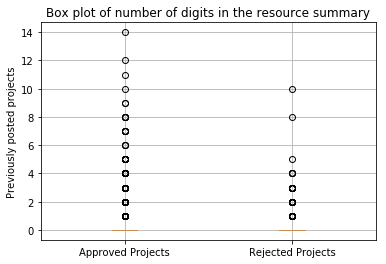

In [49]:
plt.boxplot([approved_num_digits, rejected_num_digits])
plt.title('Box plot of number of digits in the resource summary')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Previously posted projects')
plt.grid()
plt.show()

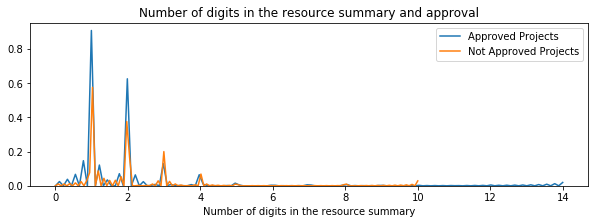

In [50]:
plt.figure(figsize=(10,3))
sns.distplot(approved_num_digits, hist=False, label="Approved Projects")
sns.distplot(rejected_num_digits, hist=False, label="Not Approved Projects")
plt.title('Number of digits in the resource summary and approval')
plt.xlabel('Number of digits in the resource summary')
plt.legend()
plt.show()

__Observations__
- As expected there are peaks around the integers and most of the projects have less than 3 digits in the resource summary.
- Few approved projects have more than 10 digits in the summary


In [51]:
z = PrettyTable()
z.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    z.add_row([i,np.round(np.percentile(approved_num_digits,i), 3), np.round(np.percentile(rejected_num_digits,i), 3)])
print(z)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        0.0        |          0.0          |
|     35     |        0.0        |          0.0          |
|     40     |        0.0        |          0.0          |
|     45     |        0.0        |          0.0          |
|     50     |        0.0        |          0.0          |
|     55     |        0.0        |          0.0          |
|     60     |        0.0        |          0.0          |
|     65     |        0.0        |          0.0         

__Observations__
- 85% of the projects have no digits mentioned in the resource summary
- Around 10% of the projects have ddigits between 0 and 2 and 5% of them have more than 2 digits 

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [52]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  \
0  \"The limits of your language are the limits o...   
1  The projector we need for our school is very c...   

                 ...                project_essay_4  \
0                ...                            NaN   
1                ...                            NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   num_digits_in_proj_resou_summary  
0                                 0  
1                                 0  

[2 rows x 21 columns]

In [53]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
#print(project_data['essay'].values[20000])
#print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [54]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [55]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

As an inclusion kindergarten teacher, I am constantly looking for materials to help students develop and grow throughout the school year.  This has been challenging with the school is limited funding for supplies. \r\n\r\nWe are a classroom of 20 friendly and curious learners, from various ethnic backgrounds, facing challenges, including poverty and developmental delays.\r\n\r\nMy students are future scholars, teachers, doctors, and accomplished human beings.  I need the public is help to raise money for materials that help maintain the attention of my special needs students.Last year was my first year teaching Kindergarten inclusion.  I learned that students can wiggle, and learn at the same time!\r\n\r\nMy students need sensory toys to maintain focus on simple tasks that will shape their social and academic future.  My students with ADHD find themselves moving their hands, feet, and bodies without much control.  Sensory toys help my students use their energy in a positive manner (fid

In [56]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As an inclusion kindergarten teacher, I am constantly looking for materials to help students develop and grow throughout the school year.  This has been challenging with the school is limited funding for supplies.     We are a classroom of 20 friendly and curious learners, from various ethnic backgrounds, facing challenges, including poverty and developmental delays.    My students are future scholars, teachers, doctors, and accomplished human beings.  I need the public is help to raise money for materials that help maintain the attention of my special needs students.Last year was my first year teaching Kindergarten inclusion.  I learned that students can wiggle, and learn at the same time!    My students need sensory toys to maintain focus on simple tasks that will shape their social and academic future.  My students with ADHD find themselves moving their hands, feet, and bodies without much control.  Sensory toys help my students use their energy in a positive manner (fidget toys, bo

In [57]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As an inclusion kindergarten teacher I am constantly looking for materials to help students develop and grow throughout the school year This has been challenging with the school is limited funding for supplies We are a classroom of 20 friendly and curious learners from various ethnic backgrounds facing challenges including poverty and developmental delays My students are future scholars teachers doctors and accomplished human beings I need the public is help to raise money for materials that help maintain the attention of my special needs students Last year was my first year teaching Kindergarten inclusion I learned that students can wiggle and learn at the same time My students need sensory toys to maintain focus on simple tasks that will shape their social and academic future My students with ADHD find themselves moving their hands feet and bodies without much control Sensory toys help my students use their energy in a positive manner fidget toys bouncy chairs etc With fidget toys my

In [58]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [59]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:08<00:00, 695.53it/s]


In [60]:
# after preprocesing
preprocessed_essays[2000]

'describing students not easy task many would say inspirational creative hard working they unique unique interests learning abilities much what common desire learn day despite difficulties encounter our classroom amazing understand everyone learns pace as teacher i pride making sure students always engaged motivated inspired create learning this project help students choose seating appropriate developmentally many students tire sitting chairs lessons different seats available helps keep engaged learning flexible seating important classroom many students struggle attention focus engagement we currently stability balls seating well regular chairs stools help students trouble balance find difficult sit stability ball long period time we excited try stools part engaging classroom community nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [61]:
# similarly you can preprocess the titles also

preprocessed_project_title = []
# tqdm is for printing the status bar
for title in tqdm(project_data['project_title'].values):
    sent = decontracted(title)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 13482.59it/s]


In [62]:
preprocessed_project_title[-1]

'i will write loud enough so you can hear me'

## 1. 4 Preparing data for models

In [63]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'num_digits_in_proj_resou_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [64]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (6000, 9)


In [65]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'FinancialLiteracy', 'ForeignLanguages', 'CommunityService', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (6000, 30)


In [66]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'num_digits_in_proj_resou_summary'],
      dtype='object')

In [67]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(np.unique(project_data['school_state'])), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (6000, 51)


In [68]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(project_data['teacher_prefix'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('str'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('str'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mrs.', 'Mr.', 'Ms.', 'Teacher']
Shape of matrix after one hot encodig  (6000, 4)


In [69]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']
Shape of matrix after one hot encodig  (6000, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [70]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (6000, 4809)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [71]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# Similarly you can vectorize for title also

vectorizer = CountVectorizer(min_df=10)
project_title_bow = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",project_title_bow.shape)

Shape of matrix after one hot encodig  (6000, 450)


#### 1.4.2.3 TFIDF vectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (6000, 4809)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [73]:
# Similarly you can vectorize for title also
vectorizer = TfidfVectorizer(min_df=10)
project_title_tfidf = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",project_title_tfidf.shape)

Shape of matrix after one hot encodig  (6000, 450)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [74]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
#Output:
    
#Loading Glove Model
#1917495it [06:32, 4879.69it/s]
#Done. 1917495  words loaded!

# ============================



Loading Glove Model


1917495it [08:19, 3842.44it/s]


Done. 1917495  words loaded!


In [75]:
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the corpus", len(words))
words = set(words)
print("the unique words in the corpus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our corpus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


#'''

all the words in the corpus 937070
the unique words in the corpus 19129
The number of words that are present in both glove vectors and our corpus 18578 ( 97.12 %)
word 2 vec length 18578


In [76]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [77]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:06<00:00, 942.24it/s]


6000
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [78]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 20011.15it/s]


6000
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [79]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [80]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:28<00:00, 209.43it/s]


6000
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [81]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [82]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title.append(vector)

print(len(tfidf_w2v_vectors_project_title))
print(len(tfidf_w2v_vectors_project_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 12284.25it/s]


6000
300


### 1.4.3 Vectorizing Numerical features

In [83]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 300.482685, Standard deviation : 379.1594914082649


### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [84]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(6000, 9)
(6000, 30)
(6000, 4809)
(6000, 1)


In [85]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
print (X.shape)
type(X)

(6000, 4849)


scipy.sparse.coo.coo_matrix

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

In [86]:
'''
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])


colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()'''

"\n# this is the example code for TSNE\nimport numpy as np\nfrom sklearn.manifold import TSNE\nfrom sklearn import datasets\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\niris = datasets.load_iris()\nx = iris['data']\ny = iris['target']\n\ntsne = TSNE(n_components=2, perplexity=30, learning_rate=200)\n\nX_embedding = tsne.fit_transform(x)\n# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix\n\nfor_tsne = np.hstack((X_embedding, y.reshape(-1,1)))\nfor_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])\n\n\ncolors = {0:'red', 1:'blue', 2:'green'}\nplt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))\nplt.show()"

In [87]:
#Store all numerical features in a numpy array 
numerical_features = pd.DataFrame(project_data['teacher_number_of_previously_posted_projects'], columns = ['teacher_number_of_previously_posted_projects'])
numerical_features['price_standardized'] = price_standardized
numerical_features = np.array(numerical_features)


In [88]:
#Similarly store all categorical features in a matrix 
categorical_features = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, 
                               project_grade_category_one_hot))
print (categorical_features.shape)


(6000, 98)


<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [89]:
print (type(categorical_features))
print (type(numerical_features))

<class 'scipy.sparse.coo.coo_matrix'>
<class 'numpy.ndarray'>


In [90]:
#The categorical and numerical features are stored in coo_matrix and numpy array. Convert them to coo_matrix 
from scipy.sparse import csr_matrix
tsne_bow_project_title = hstack((project_title_bow, csr_matrix(categorical_features), csr_matrix(numerical_features)))
print (tsne_bow_project_title.shape)
print (type(tsne_bow_project_title))

#Check if the final shape of the matrix matches with the individual matrices
if (numerical_features.shape[1]+categorical_features.shape[1]+project_title_bow.shape[1]) == tsne_bow_project_title.shape[1]:
    print ("Correct")
else:
    print ("Incorrect")

(6000, 550)
<class 'scipy.sparse.coo.coo_matrix'>
Correct


In [91]:
#Store the class label in an array 
tsne_y = np.array(project_data['project_is_approved'])
tsne_y = tsne_y.reshape(-1,1)
tsne_y.shape

(6000, 1)

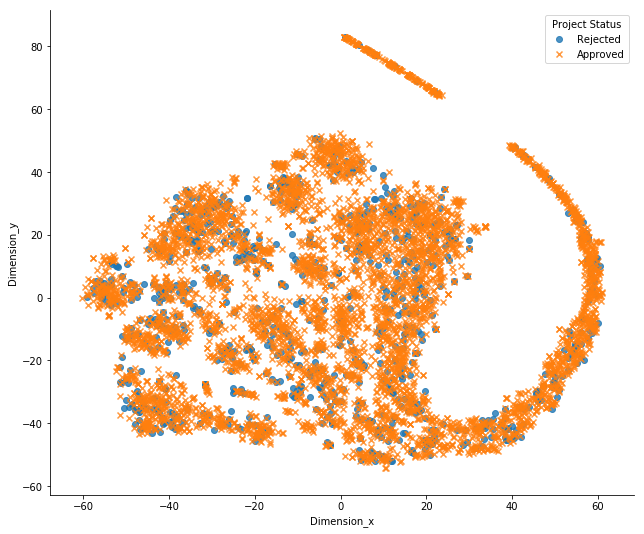

In [93]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(tsne_bow_project_title.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, tsne_y))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.lmplot.html
# https://stackoverflow.com/questions/45201514/edit-seaborn-legend
# The following fuction use lmplot functionality and plots a scatter plot. Since all the tsne plots have the same variable names
# parameters, there is no argument to the function 
def plot_tsne():
    sns.lmplot(x = 'Dimension_x', y = 'Dimension_y', data = for_tsne_df, hue='Score', fit_reg=False, legend = False,
          markers=["o", "x"])
    ax = plt.gcf()
    plt.legend(title='Project Status', loc='upper right', labels=['Rejected', 'Approved'])
    ax.set_size_inches(10, 8)
    plt.show()

plot_tsne()

__Observations__
- The approved and rejected projects cannot be differentiated as they overlap


<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [94]:
#Combine categorical features, numerical features and TFIDF project title 
tsne_tfidf_project_title = hstack((project_title_tfidf, csr_matrix(categorical_features), csr_matrix(numerical_features)))
if (numerical_features.shape[1]+categorical_features.shape[1]+project_title_tfidf.shape[1]) == tsne_tfidf_project_title.shape[1]:
    print ("Correct")
else:
    print ("Incorrect")

Correct


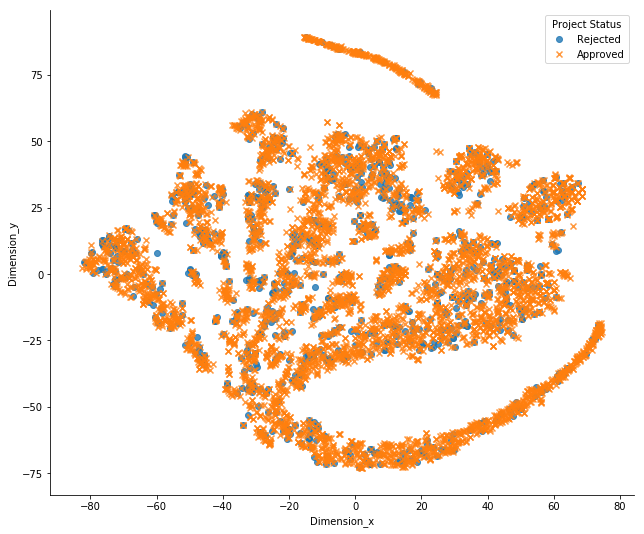

In [95]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(tsne_tfidf_project_title.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, tsne_y))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

plot_tsne()

__Observations__
- The shape formed by the datapoints are similar to the shape formed by the bag of words features. 
- The approved and rejected projects cannot be seperated as they overlap in all the regions 


<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [99]:
#Combine categorical features, numerical features and avg word to vec project title 
tsne_avgw2v_project_title = hstack((avg_w2v_vectors_title, csr_matrix(categorical_features), csr_matrix(numerical_features)))
if (numerical_features.shape[1]+categorical_features.shape[1]+ np.array(avg_w2v_vectors_title).shape[1]) == tsne_avgw2v_project_title.shape[1]:
    print ("Correct")
else:
    print ("Incorrect")

Correct


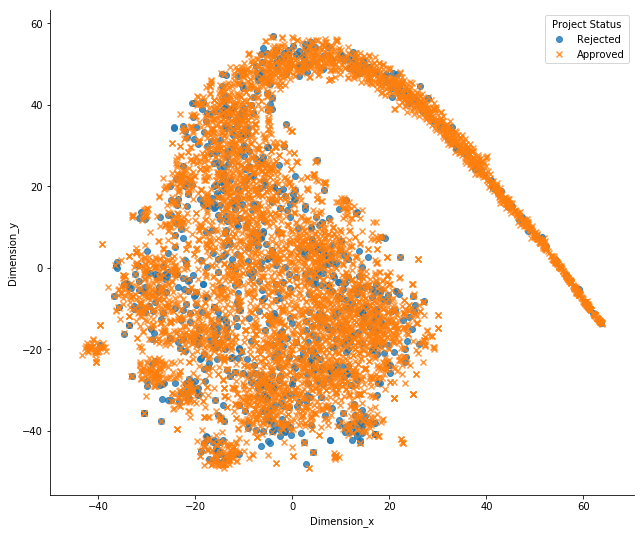

In [100]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(tsne_avgw2v_project_title.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, tsne_y))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

plot_tsne()

__Observations__
- Similar to what we have seen in the previous plots, the data points form a shape with a head and a tail and the approved and rejected data points overlap in all the regions 


<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [102]:
#Combine categorical features, numerical features and TFIDF word2vec project title 
tsne_tfidfw2v_project_title = hstack((tfidf_w2v_vectors_project_title, csr_matrix(categorical_features), csr_matrix(numerical_features)))
if (numerical_features.shape[1]+categorical_features.shape[1]+ np.array(tfidf_w2v_vectors_project_title).shape[1]) == tsne_tfidfw2v_project_title.shape[1]:
    print ("Correct")
else:
    print ("Incorrect")

Correct


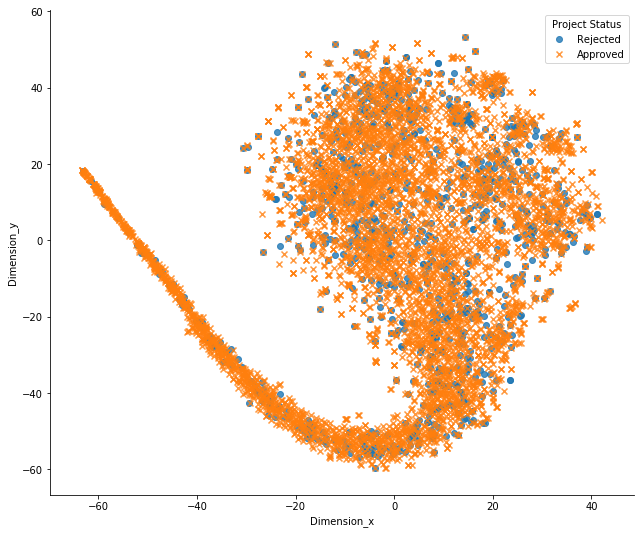

In [103]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(tsne_tfidfw2v_project_title.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, tsne_y))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

plot_tsne()

__Observations__
- The two classes, approved and rejected projects overlap and cannot be seperated
- The data points form a shape - one region with highly spread data and a tail-like region with concentrated data points 



# TSNE All features


In [104]:
#Combine all the features
tsne_all = hstack((tfidf_w2v_vectors_project_title,avg_w2v_vectors_title,project_title_tfidf,project_title_bow, csr_matrix(categorical_features), csr_matrix(numerical_features)))
print ('Total observations: {} \nTotal features: {}'.format(tsne_all.shape[0], tsne_all.shape[1]))

Total observations: 6000 
 Total features: 1600


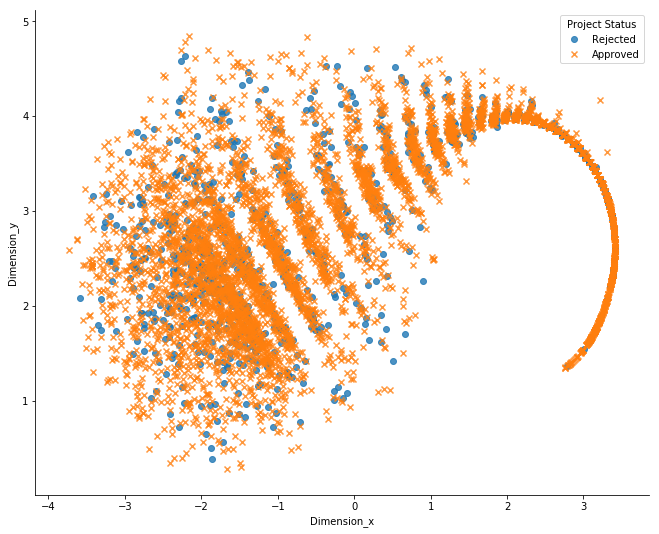

In [105]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
tsne = TSNE(n_components=2, perplexity=3000, learning_rate=200)

X_embedding = tsne.fit_transform(tsne_all.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, tsne_y))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])

plot_tsne()

__Observations__
- The datapoints overlap each other and hence, we cannot seperate the classes even with all the features combined 


<h2> 2.5 Summary </h2>

- All the plots have a similar shape - Head and tail like structure; The head like structure has data points widely spread and tail has data points densely populated
- The two classes, accepted and rejected projects, cannot be seperated in any of the feature combinations as they overlap in almost all the regions
